# 0.0 Imports

In [1]:
# Import libraries

import numpy                           as np
import pandas                          as pd
from sklearn    import datasets        as ds
from sklearn    import tree            as tr
from sklearn    import metrics         as mt
from sklearn    import model_selection as ms
from matplotlib import pyplot          as plt

# 1.0 Loading Dataset

In [2]:
# Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples, n_features=n_features,
n_informative=n_informative, n_redundant=n_redundant,
random_state=random_state )

# Separação dos dados para produção
X, x_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.3 )

# 2.0 Holdout - Train and Test 

In [3]:
# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# Treinando o modelo sobre os dados de treino
model = tr.DecisionTreeClassifier(max_depth=6)
model.fit(x_train, y_train)

# Previsão sobre os dados de teste
y_hat_test = model.predict(x_test)
score = mt.accuracy_score(y_test, y_hat_test)
print("Accuracy: {}".format(score))

Accuracy: 0.8807142857142857


## 2.1 Fine Tuning

In [5]:
# Encontrando o melhor parâmetro
values = np.arange(1, 60, 1)
scores = list()

for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)

    y_hat_test = model.predict(x_test)
    score = mt.accuracy_score(y_test, y_hat_test)
    
    scores.append(score)

### 2.1.1 Plot Comparison

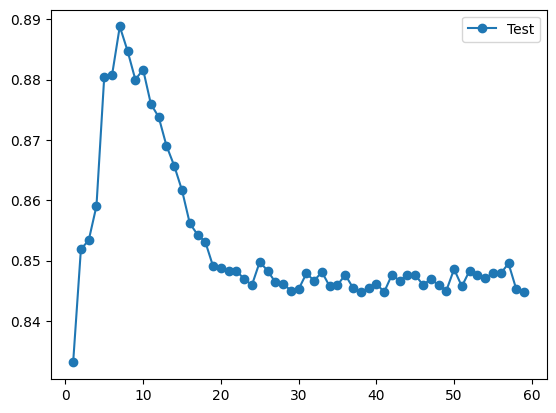

In [6]:
# Plot hyperparameters
plt.plot(values, scores, '-o', label="Test")
plt.legend()

## 2.2 Production Result

In [7]:
# Treinando o modelo sobre os dados de treino + teste
last_model = tr.DecisionTreeClassifier(max_depth=7)
last_model.fit(np.concatenate((x_train, x_test)), np.concatenate((y_train, y_test)))

# Previsão sobre os dados de produção
y_hat_prod = last_model.predict(x_prod)
score_prod = mt.accuracy_score(y_prod, y_hat_prod)
print("Accuracy: {}".format(score_prod))

Accuracy: 0.8771666666666667


# 3.0 Holdout - Train, Validation and Test

In [8]:
# Separando os dados de treino em treino 2 e validação
x_train, x_val, y_train, y_val = ms.train_test_split(x_train, y_train, test_size=0.3, random_state=0)

## 3.1 Fine Tuning Validation

In [9]:
# Encontrando o melhor parâmetro
values = np.arange(1, 60, 1)
scores_val = list()

for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)

    y_hat_val = model.predict(x_val)
    score_val = mt.accuracy_score(y_val, y_hat_val)
    
    scores_val.append(score_val)

### 3.1.1 Plot Comparison

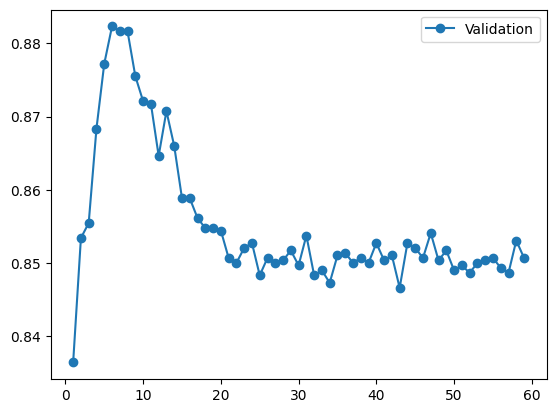

In [10]:
# Plot hyperparameters
plt.plot(values, scores_val, '-o', label="Validation")
plt.legend()

### 3.1.2 Validation Result

In [11]:
# Treinando o modelo sobre os dados de treino 2
model = tr.DecisionTreeClassifier(max_depth=6)
model.fit(x_train, y_train)

# Previsão sobre os dados de validacao
yhat_val = model.predict( x_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validation: {}".format( acc_val ) )

Accuracy Over Validation: 0.882312925170068


## 3.2 Test Result

In [12]:
# Treinando o modelo sobre os dados de treino 2 + validação 
last_model_test = tr.DecisionTreeClassifier(max_depth=7)
last_model_test.fit(np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)))

# Previsão sobre os dados de teste
y_hat_test = last_model_test.predict(x_test)
score_test = mt.accuracy_score(y_test, y_hat_test)
print("Accuracy: {}".format(score_test))

Accuracy: 0.8885714285714286


## 3.3 Production Final Result

In [13]:
# Previsão sobre os dados de produção
# O score necessariamente precisa estar parecido com o score de teste
y_hat_prod = last_model_test.predict(x_prod)
score_prod = mt.accuracy_score(y_prod, y_hat_prod)
print("Accuracy: {}".format(score_prod))

Accuracy: 0.888
